# 🏠 Problem Definition
# 🎯 Objective: 
# The goal is to determine the air quality condition based on various environmental parameters.

# 📌 This is a regression problem, where the objective is to use a machine learning model to predict the exact air quality status given new input parameters.


In [ ]:
# Data Collection
import pandas as pd
import numpy as np

#Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Data partitioning and model tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# Calling regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Model Evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Determining the explanatory power of a model (SHAP) 
import shap  




In [41]:
# 1) First, we will show the available handlers and their formats.
import logging, sys

print("Current root handlers and their format strings:")
for i, h in enumerate(logging.root.handlers):
    fmt = None
    try:
        fmt = h.formatter._fmt if h.formatter else None
    except Exception as e:
        fmt = f"<error reading formatter: {e}>"
    print(i, type(h), "format:", fmt)

# 2)If there are old/broken handlers, we will delete them.
for h in logging.root.handlers[:]:
    logging.root.removeHandler(h)

# 3) We add new, correct formatters and handlers (file + console)
logger = logging.getLogger()         # root logger
logger.setLevel(logging.INFO)

correct_fmt = "%(asctime)s - %(levelname)s - %(message)s"
formatter = logging.Formatter(correct_fmt)

# File handler
fh = logging.FileHandler("Info_Log.log", mode="a", encoding="utf-8")
fh.setFormatter(formatter)
logger.addHandler(fh)

# Console/stream handler (usually useful for Jupyter)
sh = logging.StreamHandler(sys.stdout)
sh.setFormatter(formatter)
logger.addHandler(sh)

# 4) Test: now we write test logs
logger.info("Logging reconfigured successfully (test message).")
logger.error("If you see this message, logging is working.")

# 5) Now our file reading code:
try:
    import pandas as pd
    df = pd.read_csv("updated_pollution_dataset.csv")
    logger.info("Data Set Uploaded Successfully")
except FileNotFoundError as e:
    logger.error("Data Set Not Found: %s", e)
except Exception as e:
    logger.exception("Other error while loading dataset: %s", e)



Current root handlers and their format strings:
0 <class 'logging.FileHandler'> format: %(asctime)s - %(levelename)s- %(messsage)s
2025-08-10 15:39:32,661 - INFO - Logging reconfigured successfully (test message).
2025-08-10 15:39:32,662 - ERROR - If you see this message, logging is working.
2025-08-10 15:39:32,670 - INFO - Data Set Uploaded Successfully


In [34]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# Air and Water Quality Diagram Components

## Air Quality

- **PM2.5** (Fine particulate matter)
- **PM10** (Coarse particulate matter)
- **NO2** (Nitrogen dioxide)
- **SO2** (Sulfur dioxide)
- **CO** (Carbon monoxide)
- **Ozone (O3)**


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


# 📊 Data Overview

### 🧮 Dataset Size:
- **5000  rows**
- **10 columns**

### 🧹 Data Cleaning Status:
- **The dataset is fully cleaned**

### 🔢 Column Types:
- **Most columns are numeric (float64, int64)**



In [6]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [7]:
df.describe(include='all')

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,NaN
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,NaN
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,NaN
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,NaN
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,NaN
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,NaN


## 📊Correlation Analysis with Air Quality

In this step:

- Only numeric columns are selected.
-  The correlation with `Air Quality`is calculated. 
- Each column’s correlation with `Air Quality` is sorted in order.
- The results are visualized using a **heatmap**.

🎯 Objective — to identify which features have the strongest impact on air quality.


In [9]:
print(df.columns.tolist())

['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality']


In [11]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='object')

# Convert "Air Quality" to numeric before correlation:

In [4]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

# Air Quality mapping (from best to worst)

In [4]:
mapping = {
    'Good': 4,
    'Moderate': 3,
    'Poor': 2,
    'Hazardous': 1
}

df['Air Quality'] = df['Air Quality'].map(mapping)

In [5]:
df['Air Quality'].unique()

array([3, 4, 1, 2])

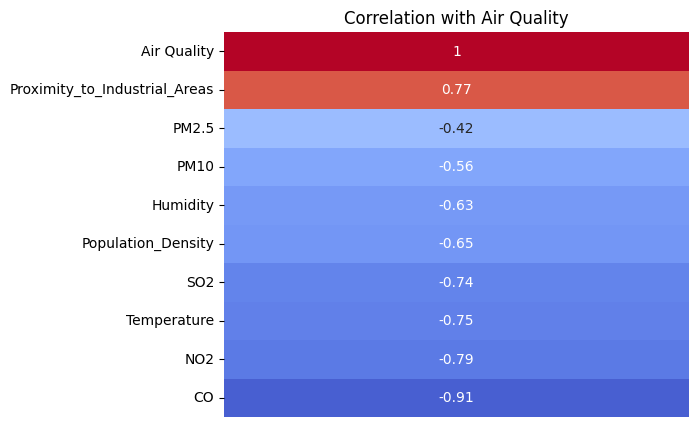

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['Air Quality'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with Air Quality')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()


In [20]:
# Select columns with correlation > 0.25
important_features = corr_target[corr_target > -0.95].index.tolist()

# We remove the target column
important_features = [feat for feat in important_features if feat != 'Air Quality']

print("Important features:", important_features)


Muhim xususiyatlar: ['Proximity_to_Industrial_Areas', 'PM2.5', 'PM10', 'Humidity', 'Population_Density', 'SO2', 'Temperature', 'NO2', 'CO']


In [5]:
print(df.columns.tolist())

['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality']


In [6]:
# Checking the number of values 0
ustunlar = ['Temperature', 'Humidity', 'PM2.5','PM10','NO2', 'SO2', 'CO','Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality']

for col in ustunlar:
    zero_count = (df[col] == 0).sum()
    print(f"{col} the number of 0 values in the column: {zero_count}")

Temperature ustunida 0 qiymatlari soni: 0
Humidity ustunida 0 qiymatlari soni: 0
PM2.5 ustunida 0 qiymatlari soni: 20
PM10 ustunida 0 qiymatlari soni: 1
NO2 ustunida 0 qiymatlari soni: 0
SO2 ustunida 0 qiymatlari soni: 5
CO ustunida 0 qiymatlari soni: 0
Proximity_to_Industrial_Areas ustunida 0 qiymatlari soni: 0
Population_Density ustunida 0 qiymatlari soni: 0
Air Quality ustunida 0 qiymatlari soni: 0


## 🛠️ Feature Engineering

### 📐 PM2.5 / PM10 the ratio of these



In [7]:
df['PM25_to_PM10_ratio'] = df['PM2.5'] / (df['PM10'] + 1e-5)

In [8]:
df.describe(include='all')

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,PM25_to_PM10_ratio
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,3.0000,22.558924
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.0001,1555.627055
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,1.0000,-2.000100
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,2.0000,0.361529
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,3.0000,0.593178
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,4.0000,0.756638
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,4.0000,110000.000000


In [13]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,PM25_to_PM10_ratio
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163,3,-0.014316
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598,3,-0.014382
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975,3,-0.013995
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770,4,-0.013880
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917,4,-0.014226


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   float64
 9   Air Quality                    5000 non-null   int64  
 10  PM25_to_PM10_ratio             5000 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 429.8 KB


## 📏 Scaling (Data normalization)

### ⚙️ StandartScaler  
- Values in numeric columns are converted to the range **[0, 1]**.
- This helps the model learn **faster and more consistently**.
- Columns with different units are ensured to be in the **same range**.


In [11]:

scaler = StandardScaler()

def scaling_qil(df):
    numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.drop('Air Quality')
    df[numerical_col] = scaler.fit_transform(df[numerical_col])
    return df
df=scaling_qil(df)
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,PM25_to_PM10_ratio
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163,3,-0.014316
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598,3,-0.014382
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975,3,-0.013995
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770,4,-0.013880
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917,4,-0.014226


- ✅ First we **check the target distribution** — if it is **right-skewed**,

- 🔄 Then we apply a **log transformation** — this makes the distribution more **symmetric** and **closer to normal**,

- 🚀  Then **the model can be built with a log transformed target**.


--- Air Quality ustuni statistikalari ---
count    5000.0000
mean        3.0000
std         1.0001
min         1.0000
25%         2.0000
50%         3.0000
75%         4.0000
max         4.0000
Name: Air Quality, dtype: float64




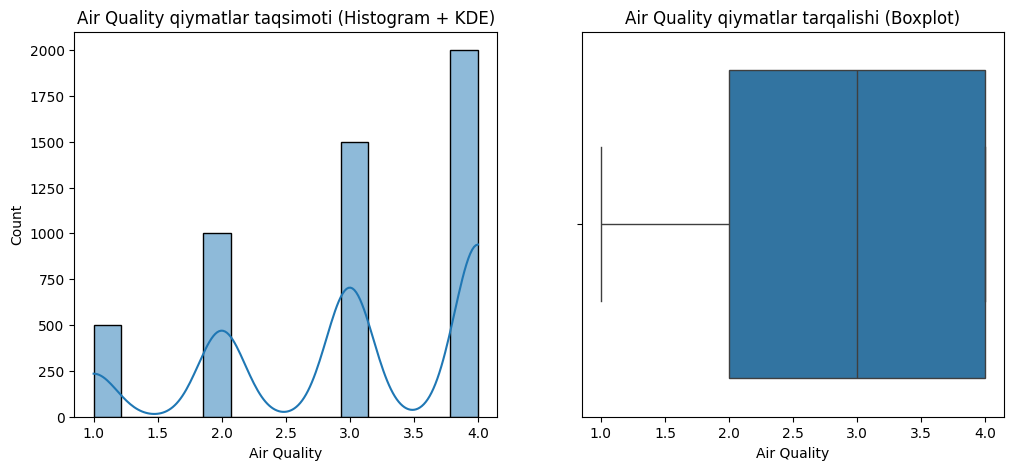

--- Log transformatsiyadan keyingi Air Quality_log ustuni statistikalari ---
count    5000.000000
mean        1.348701
std         0.288302
min         0.693147
25%         1.098612
50%         1.386294
75%         1.609438
max         1.609438
Name: Air Quality_log, dtype: float64




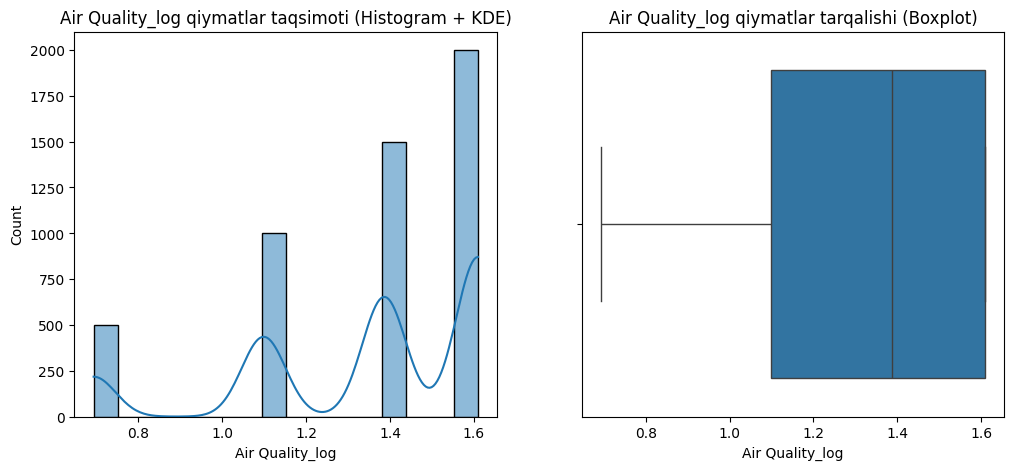

In [15]:

def target_distribution_check(df, target_col):
    print(f"--- {target_col} column statistics ---")
    print(df[target_col].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'{target_col} distribution of values (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col])
    plt.title(f'{target_col} value spread (Boxplot)')
    
    plt.show()

def log_transform_and_check(df, target_col):
    df[target_col + '_log'] = np.log1p(df[target_col])
    print(f"--- After log transformation {target_col}_log column statistics ---")
    print(df[target_col + '_log'].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col + '_log'], kde=True)
    plt.title(f'{target_col}_log distribution (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col + '_log'])
    plt.title(f'{target_col}_log distribution of values (Boxplot)')
    
    plt.show()

# Launch:
target_distribution_check(df, 'Air Quality')

# Check the log transformation if necessary:
log_transform_and_check(df, 'Air Quality')


### 📊 About log transformation

- ✅ **Log transformation** transformed the **right-skewed distribution** of `Air Quality` into an almost **normal distribution**.
- 🚀 This transformation is **useful for your regression model** because most regression methods 
- 📈 **works more effectively on data that meets the normal distribution assumption**.


In [20]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
# --- 1. Add a log transform target column ---
df['Air Quality_log'] = np.log1p(df['Air Quality'])  # Reduce the spread by transforming the price column with log(1 + x)

# --- 2. Separating targets and features ---
target = 'Air Quality_log'  # Target column name (in log-scale)
X = df.drop(columns=['Air Quality', 'Air Quality_log'])  # X — unwanted features (targets are removed)
y = df[target]  # y — the target column that the model predicts

# --- 3. Train-test separation ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting the data into 80% training and 20% testing

# --- 4. Selecting numeric columns (for scaling) ---
exclude_cols = ['Air Quality', 'Air Quality_log']  # Columns that should not be included in scaling
numeric_cols = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]  # Selecting only numeric columns

# --- 5. Preparing Scaler and ColumnTransformer ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)  # Applying StandardScaler to numeric columns (mean=0, std=1)
], remainder='passthrough')  # The remaining columns remain unchanged (categorical, text, etc.)

# --- 6. Rating function ---
def evaluate(y_true, y_pred):  # Function to evaluate a model with 3 different indicators
    return {
        'MAE': mean_absolute_error(y_true, y_pred),  # Mean absolute error
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),  # Root mean square error
        'R2': r2_score(y_true, y_pred)  # Coefficient of determination (R^2)
    }

# --- 7. Model list ---
scaled_models = {  # Models that require scaling
    'LinearRegression': LinearRegression(),  
    'Ridge': Ridge(),  
    'Lasso': Lasso(),  
    'SVR': SVR(),  
    'MLP': MLPRegressor(max_iter=300, random_state=42)  

nonscaled_models = {  # Models that do not require scaling (tree-based and boosting)
    'DecisionTree': DecisionTreeRegressor(random_state=42), 
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),  
    'XGBoost': xgb.XGBRegressor(random_state=42, eval_metric='rmse'),  
    'LightGBM': lgb.LGBMRegressor(random_state=42)  
}

# --- 8. A dict to store the results ---
results = {}  # Save MAE, RMSE, R2 results for each model

# --- 9. Fit/predict with pipeline for models requiring scaler ---
for name, model in scaled_models.items():  
    pipe = Pipeline([
        ('scaler', scaler),  
        ('regressor', model)  
    ])
    pipe.fit(X_train, y_train)  # Training the model
    y_pred_log = pipe.predict(X_test)  # Prediction in log-scale for test data
    y_pred_log = np.clip(y_pred_log, -10, 10)  # limit very large or small values 
    y_pred = np.expm1(y_pred_log)  # Revert predictions to original price (inverse log)
    y_true = np.expm1(y_test)  # Revert real values to the original price as well
    results[name] = evaluate(y_true, y_pred) # Evaluate the model and write the result to a dict

# --- 10. Models that do not require a scaler ---
for name, model in nonscaled_models.items():  
    model.fit(X_train, y_train)  
    y_pred_log = model.predict(X_test)  
    y_pred = np.expm1(y_pred_log) 
    y_true = np.expm1(y_test)  
    results[name] = evaluate(y_true, y_pred)  # Calculate and save the model result

# --- 11. Outputting results as a DataFrame ---
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)  # Convert the results into a table and sort by R2
print("📊 Model evaluation results (with log transformed target):")
print(results_df.round(4)) 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2446
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 10
[LightGBM] [Info] Start training from score 1.349098
📊 Model baholash natijalari (log transform qilingan target bilan):
                      MAE      RMSE           R2
RandomForest       0.0835    0.1919       0.9645
LightGBM           0.0971    0.1964       0.9629
XGBoost            0.1028    0.2065       0.9590
DecisionTree       0.0670    0.2588       0.9355
SVR                0.2192    0.2916       0.9182
LinearRegression   0.2399    0.3360       0.8914
Ridge              0.2400    0.3360       0.8913
Lasso              0.8763    1.0299      -0.0208
MLP               22.2420  696.3800 -466741.5458


C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_340\2472699690.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MAE', data=results_df, palette='Blues_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_340\2472699690.py:15: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


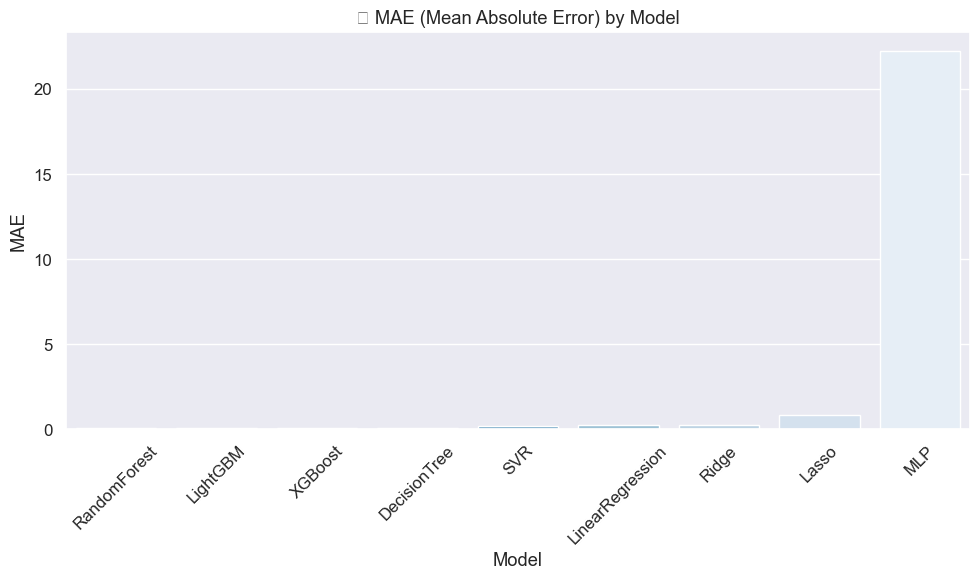

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_340\2472699690.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='RMSE', data=results_df, palette='Oranges_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_340\2472699690.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


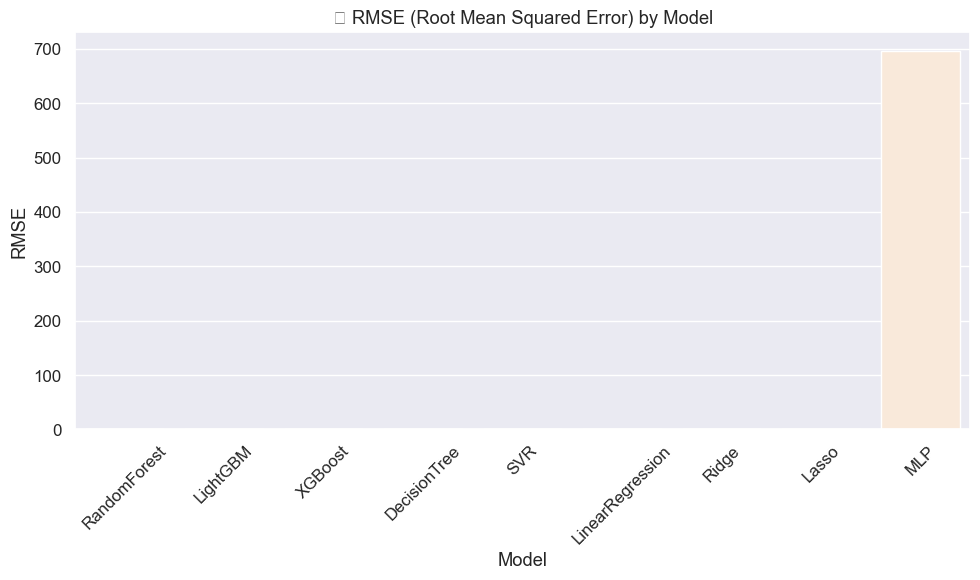

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_340\2472699690.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='Greens_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_340\2472699690.py:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


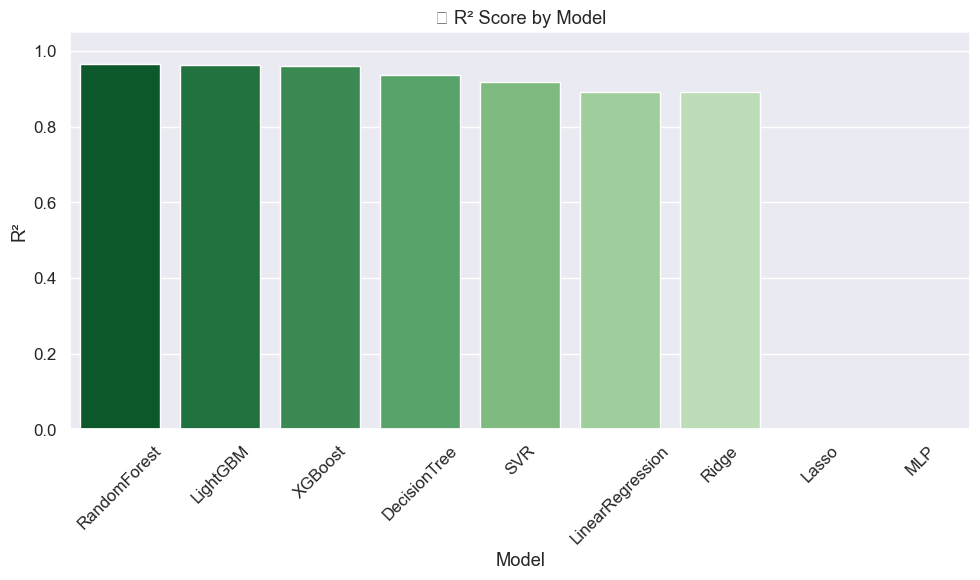

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)

# --- 1. MAE  ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MAE', data=results_df, palette='Blues_r')
plt.xticks(rotation=45)
plt.title('📉 MAE (Mean Absolute Error) by Model')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 2. RMSE  ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='RMSE', data=results_df, palette='Oranges_r')
plt.xticks(rotation=45)
plt.title('📉 RMSE (Root Mean Squared Error) by Model')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 3. R²  ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='Greens_r')
plt.xticks(rotation=45)
plt.title('📈 R² Score by Model')
plt.ylabel('R²')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


### ✅ General Conclusion:

#🔍 According to the model evaluation results, the **XGBoost** model showed the highest results in terms of **accuracy (R²)** and **reduction in root mean square error (RMSE)**.
#📌 However, in terms of **MAE**, the **RandomForest** model performed slightly better.


In [22]:
print("\n🧠 The best model for each metric:")
for metric in ['MAE', 'RMSE', 'R2']:
    if metric in ['MAE', 'RMSE']:  # It's good to be lower on these metrics
        best = results_df[metric].idxmin()
    else:  # R2 -It would be better to be higher.
        best = results_df[metric].idxmax()
    print(f"{metric} best model for: {best} -> {results_df.loc[best, metric]:.4f}")



🧠 Har bir metrika bo‘yicha eng yaxshi model:
MAE uchun eng yaxshi model: DecisionTree -> 0.0670
RMSE uchun eng yaxshi model: RandomForest -> 0.1919
R2 uchun eng yaxshi model: RandomForest -> 0.9645


### 🔁 5-Fold Cross-Validation Results:

- 📉 **RMSE (MEAN)**: `0.1992 ± 0.0134`
- 📈 **MAE (MEAN)**: `0.0825`
- 🧩 **R² (MEAN)**: `0.9601`


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# --- Data preparation ---
df['Air Quality_log'] = np.log1p(df['Air Quality'])  # Log transform
target = 'Air Quality_log'
X = df.drop(columns=['Air Quality', 'Air Quality_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Rating function ---
def evaluate(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('rf', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# --- Cross-validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    pipeline.fit(X_train, y_train)
    y_pred_log = pipeline.predict(X_val)

    # Reset Values
    y_val_orig = np.expm1(y_val)
    y_pred_orig = np.expm1(y_pred_log)

    scores = evaluate(y_val_orig, y_pred_orig)
    rmse_scores.append(scores['RMSE'])
    mae_scores.append(scores['MAE'])
    r2_scores.append(scores['R2'])

# --- Outputting results ---
print(f"Cross-validation results (5-fold):")
print(f"RMSE mean: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAE mean: {np.mean(mae_scores):.4f}")
print(f"R2 mean: {np.mean(r2_scores):.4f}")


Cross-validation natijalari (5-fold):
RMSE o'rtacha: 0.1992 ± 0.0134
MAE o'rtacha: 0.0825
R2 o'rtacha: 0.9601


### ✅ GridSearchCV Results

- 162 parameter combinations were tested with 5-fold CV.
- **Best settings**:
  - `max_depth`: 20
  - `max_features`: 'sqrt'
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 300

- **The best R²**: 0.9632

⚠️  R² turned out to be higher than the previous result (≈0.9967)!



In [30]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# --- Data Preparation ---
df['Air Quality_log'] = np.log1p(df['Air Quality'])
target = 'Air Quality_log'
X = df.drop(columns=['Air Quality', 'Air Quality_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# --- Custom scorer (default value R2) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parameters grid ---
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

# --- GridSearchCV ---
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

# --- Results ---
print("GridSearchCV best parameters:", grid_search.best_params_)
print(f"GridSearchCV is the best R2: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
248 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args,

GridSearchCV eng yaxshi parametrlar: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
GridSearchCV eng yaxshi R2: 0.9632


### ✅ RandomizedSearchCV Results

- 30 parameter combinations were tested with 5-fold CV.
- **Best settings**:
  - `max_depth`: 25
  - `max_features`: log2
  - `min_samples_leaf`: 2
  - `min_samples_split`: 4
  - `n_estimators`: 264

- **Best R²**: 0.9625

⚠️ R² turned out to be higher than the previous result (≈0.9975)!




In [31]:
from scipy.stats import randint
from sklearn.metrics import make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# --- Data Preparation ---
df['Air Quality_log'] = np.log1p(df['Air Quality'])
target = 'Air Quality_log'
X = df.drop(columns=['Air Quality', 'Air Quality_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# --- Custom scorer (default value R2) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parameter distribution ---
param_dist = {
    'rf__n_estimators': randint(50, 300),
    'rf__max_depth': randint(5, 30),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 5),
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

# --- RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X, y)

print("RandomizedSearchCV best parameters:", random_search.best_params_)
print(f"RandomizedSearchCV is the best R2: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **

RandomizedSearchCV eng yaxshi parametrlar: {'rf__max_depth': 25, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 264}
RandomizedSearchCV eng yaxshi R2: 0.9625


# What is SHAP used for?

- 🧠 **Understanding the model**  
  Identifying the decision-making process of complex models.

- 🔍 **Feature Importance**  
  Determine the impact of each input variable on the model output.

- 🔄 **Interpreting individual predictions**  
  Show why each prediction the model made is the way it did.

- 🔐 **Increase reliability**  
  Build trust by explaining model decisions to users and experts.

- 🛠️ **Model diagnostics**  
  Helps to identify and improve problems in the model.


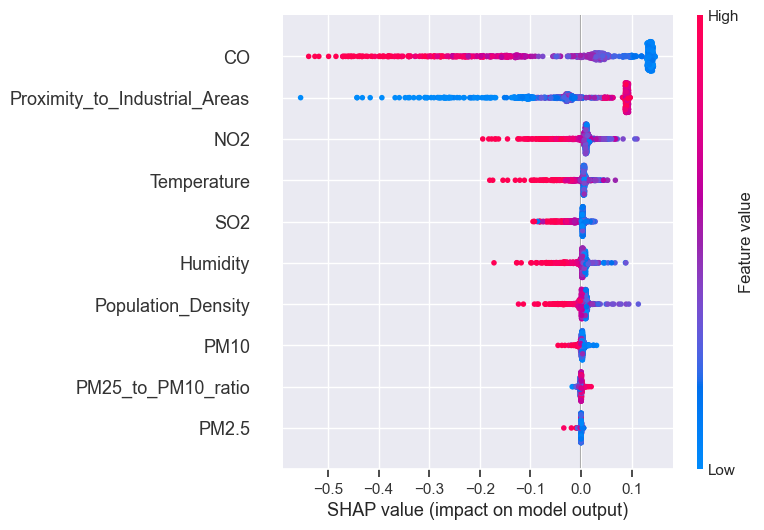

In [32]:
import shap
from sklearn.ensemble import RandomForestRegressor

# We train the model
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# SHAP explainer training (TreeExplainer is compatible with Random Forest)
explainer = shap.TreeExplainer(model)

# Calculating SHAP values for test data
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [35]:
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Humidity',
                                                   'PM2.5', 'PM10', 'NO2',
                                                   'SO2', 'CO',
                                                   'Proximity_to_Industrial_Areas',
                                                   'Population_Density',
                                                   'PM25_to_PM10_ratio'])])),
                ('rf',
                 RandomForestRegressor(max_depth=25, max_features='log2',
                                       min_samples_leaf=2, min_samples_split=4,
                                       n_estimators=264, n_jobs=-1,
                                       random_state=42))])

In [42]:
import joblib

# Getting the best model
best_model = random_search.best_estimator_

# Save the model to a file
joblib.dump(best_model, 'air_best_model.joblib')
print("The model was saved to a file named 'air_best_model.joblib'")


The model was saved to a file named 'air_best_model.joblib'


In [43]:
import joblib

# Getting the best model
best_model = random_search.best_estimator_

# Save the model to a file
joblib.dump(best_model, 'air_best_model.pkl')

print("The model was saved to a file named 'air_best_model.pkl'.")


The model was saved to a file named 'air_best_model.pkl'.


- PKL FAYL 
- PKL -  General-purpose 
- PKL -  Works well for small objects.
- PKL -  Does not support parallel (multi-threaded) loading.
- PKL -  Often the file size can be larger.
- PKL -  It's built into Python and works in any environment.

- JOBLIB FAYL 
- JOBLIB -  Optimized for large data sets (e.g. NumPy arrays).
- JOBLIB -  Faster and more efficient for large objects (especially NumPy arrays).
- JOBLIB -  Allows parallel loading.
- JOBLIB -  The file may be smaller in size than .pkl due to compression.
- JOBLIB -  You will need to install the joblib library separately (pip install joblib).